# Predict whether person has a Chronic Kidney Disease or not

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [71]:
data=pd.read_csv("D:\ML\Kidney Disease Prediction\KidneyDisease.csv")

In [72]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Renaming Attributes to be user friendly

In [73]:
columns=pd.read_csv("D:\ML\Kidney Disease Prediction\Description.txt",sep='-')
columns=columns.reset_index()
columns.columns=['cols','add_col_names']

In [74]:
columns

,cols,add_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [75]:
data.columns=columns['add_col_names'].values

In [76]:
data

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


### Checking data type

In [77]:
data.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

### Updating Data Types
As it can be seen, red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We need to change to numerical dtype as it is having numeric value.

In [78]:
def convert_dtype(data,feature):
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

In [79]:
features=['red blood cell count','packed cell volume','white blood cell count']

for feature in features:
    convert_dtype(data,feature)

### Removing unwanted Columns
Let's drop the id column. id column is seems to be an unique identifier for each row so we are dropping that it won't 
help us to find any insights from the data

In [80]:
data.drop(["id"],axis=1,inplace=True) 

### Extract Numerical & Categorical Features

In [81]:
def extract_cat_num(data):
    cat_col=[col for col in data.columns if data[col].dtype=='object']
    num_col=[col for col in data.columns if data[col].dtype!='object']
    return cat_col,num_col

In [82]:
cat_col,num_col=extract_cat_num(data)

In [83]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [84]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

### Data Cleaning

In [17]:
for col in cat_col:
    print('{} has {} values '.format(col,data[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




we can obsorb some kind of dirtyness in data in diabetes_mellitus and coronary_artery_disease and class.
So we need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [85]:
data['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes'},inplace=True)

data['coronary artery disease'] = data['coronary artery disease'].replace(to_replace = '\tno', value='no')

data['class'] = data['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [86]:
for col in cat_col:
    print('{} has {} values '.format(col,data[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' nan] values 


coronary artery disease has ['no' 'yes' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'notckd'] values 




###  Analysing distribution of each and every numerical column

In [87]:
len(num_col)

14

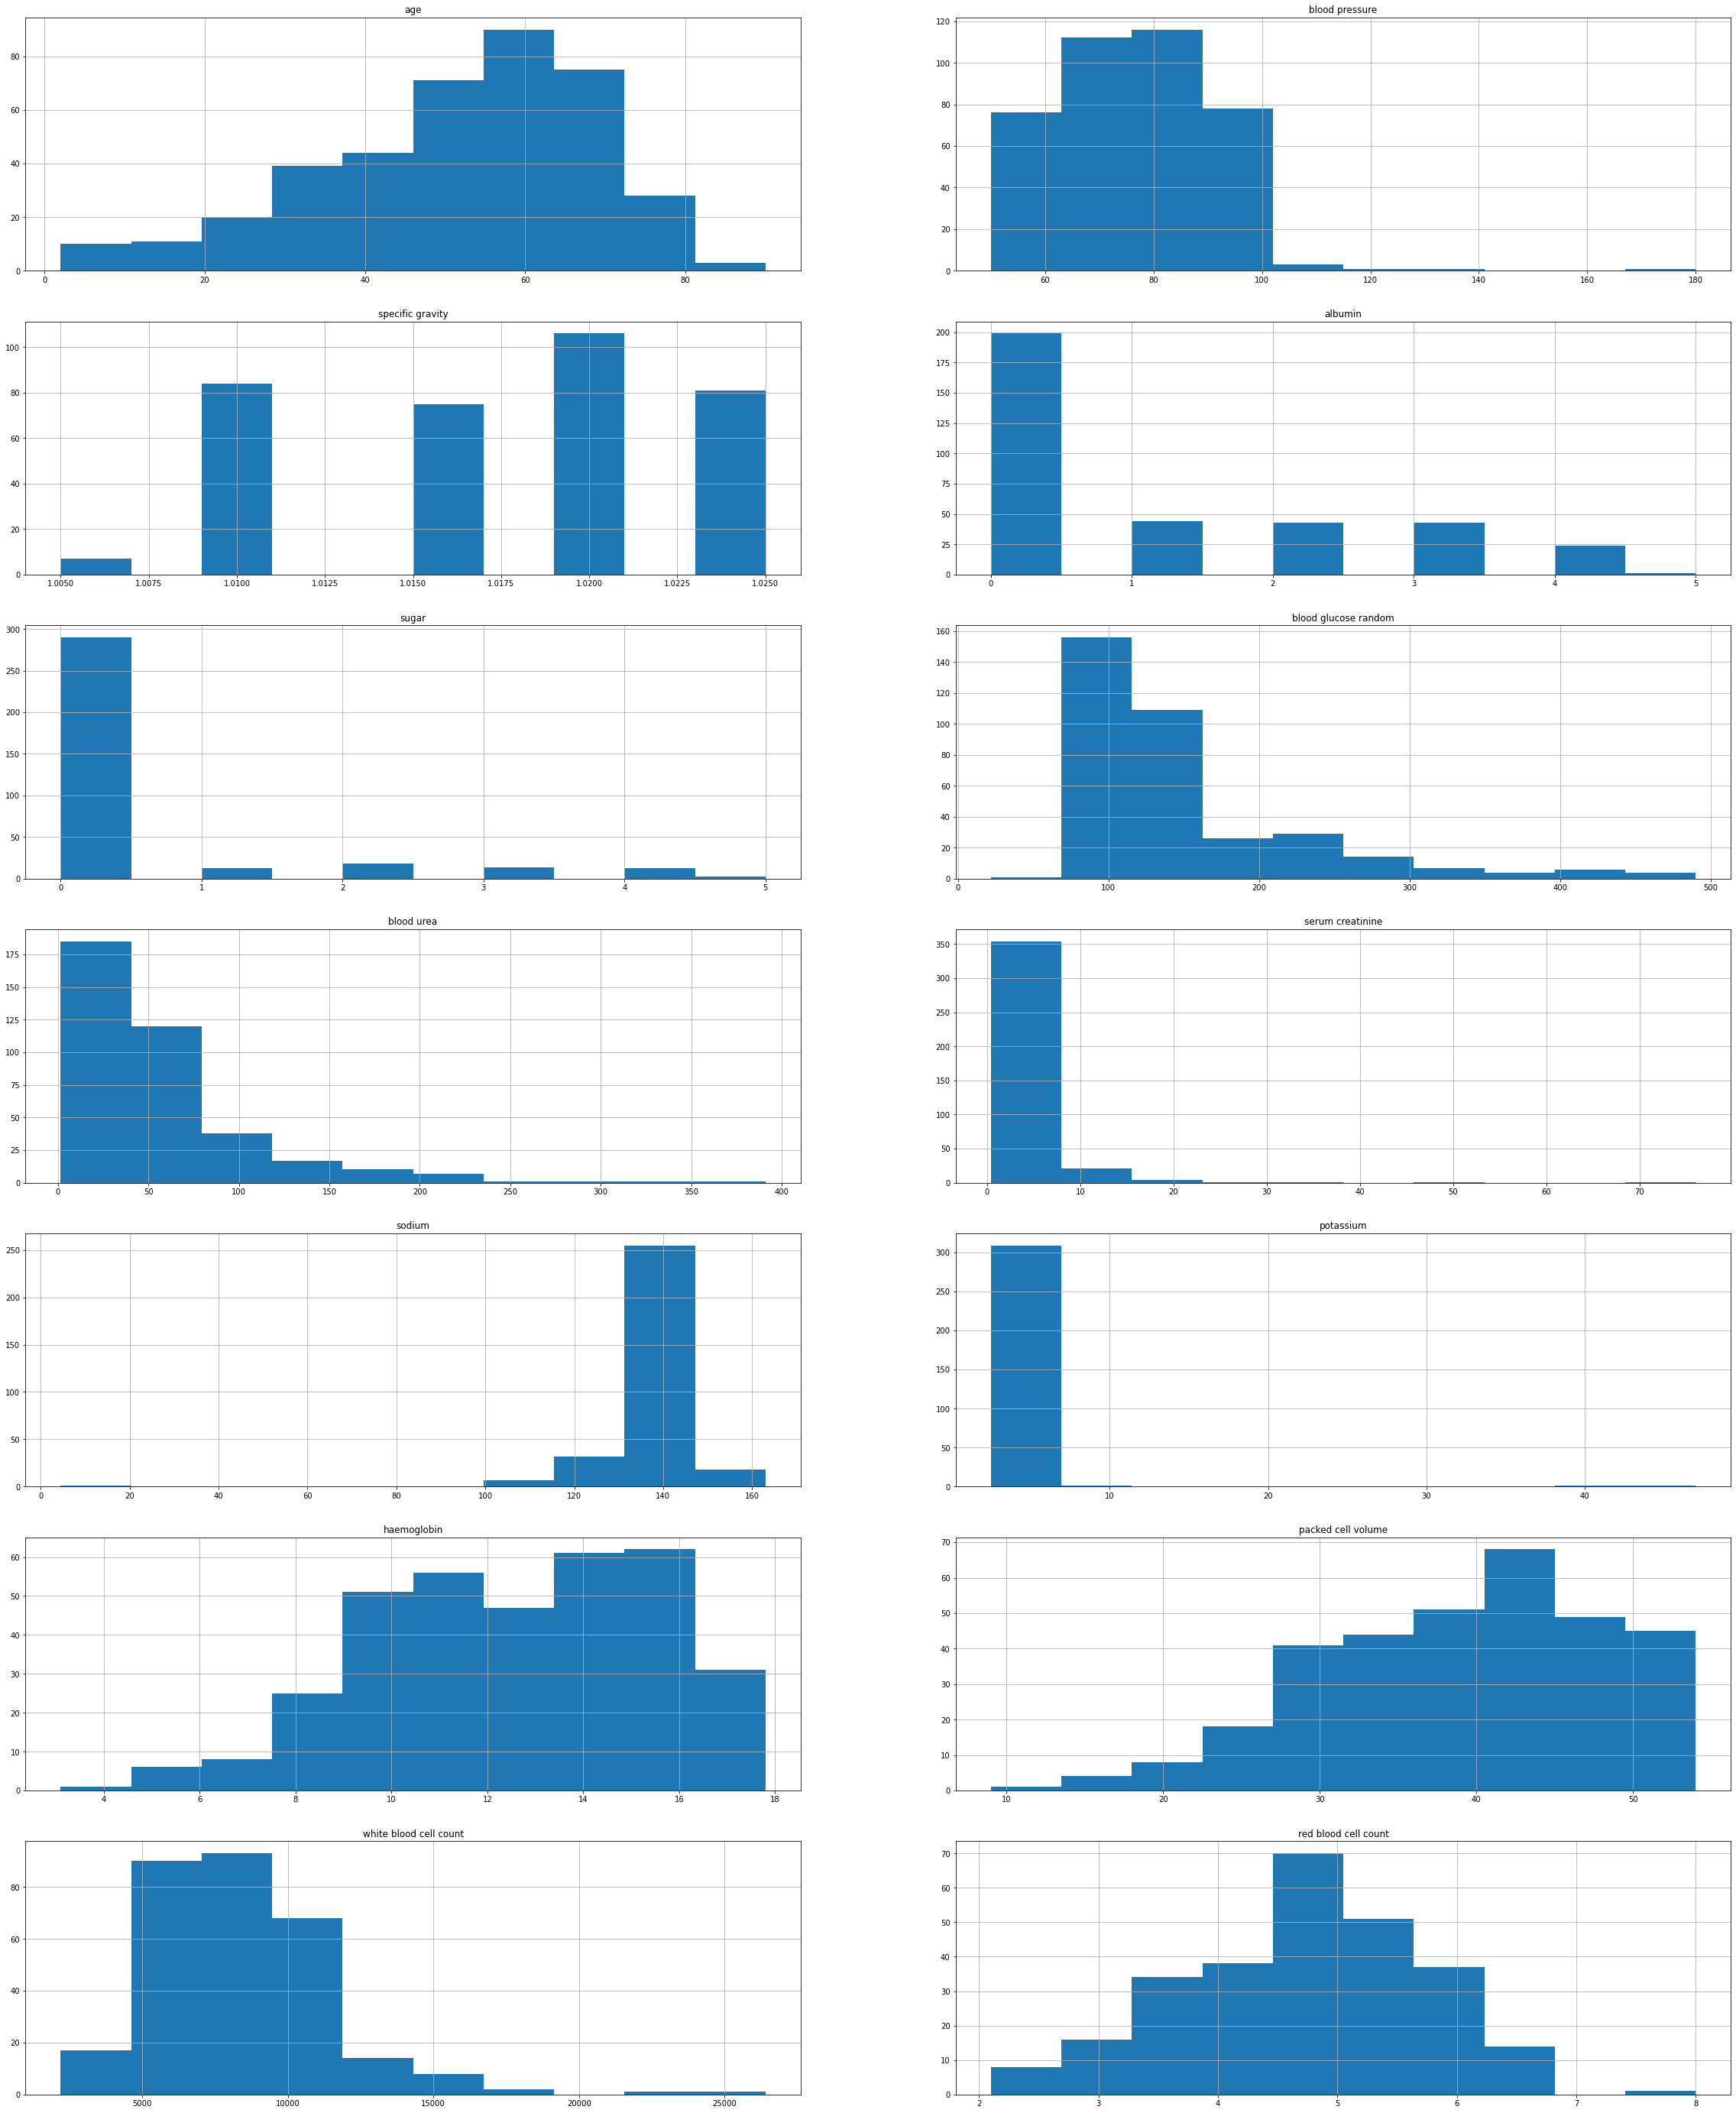

In [88]:
plt.figure(figsize=(40,50))
for i,feature in enumerate(num_col):
    plt.subplot(7,2,i+1)   #arrangement
    data[feature].hist()   #Histogram 
    plt.title(feature)

Observations:
    1.age looks a bit left skewed
    2.Blood gluscose random is right skewed
    3.Blood Urea is also a bit right skewed
    4.Rest of the features are lightly skewed

###  Analysing distribution of each and every Categorical column

In [89]:
len(cat_col)

11

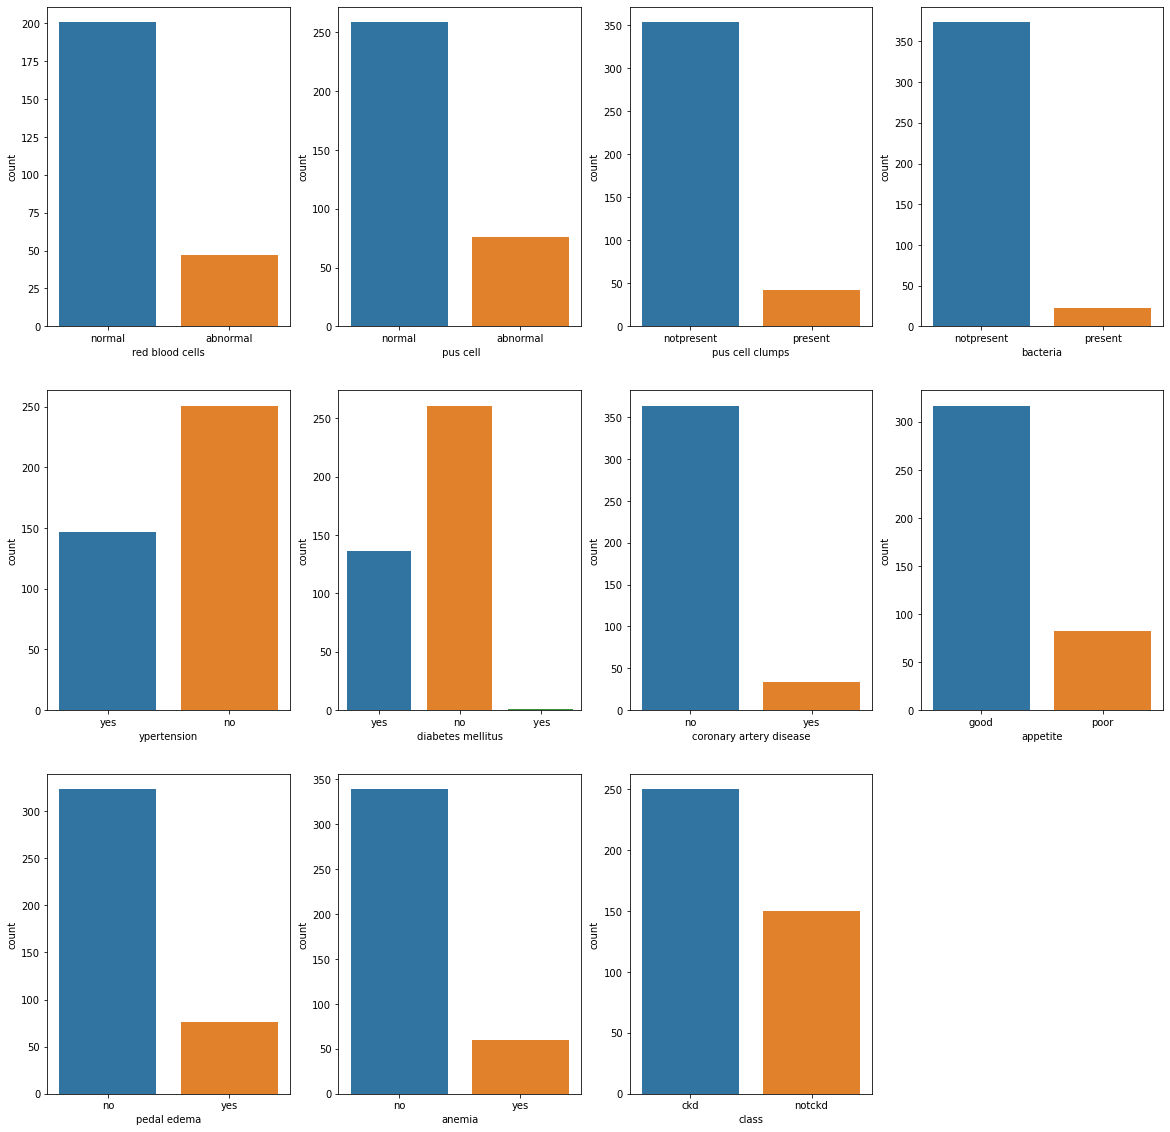

In [90]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(3,4,i+1)
    sns.countplot(data[feature])

A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

Check how columns are co-related with each other and its impact on target feature

<AxesSubplot:xlabel='class', ylabel='count'>

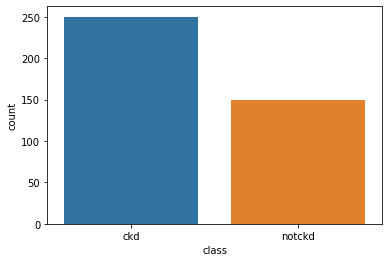

In [91]:
sns.countplot(data['class'])

###  Correlations

<AxesSubplot:>

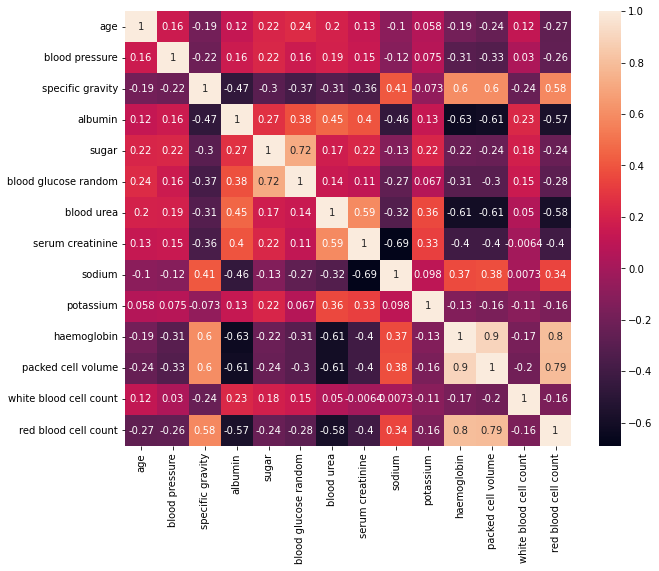

In [92]:
plt.figure(figsize=(10,8))
data.corr()
sns.heatmap(data.corr(),annot=True)

Positive Correlation:

Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
Sugar -> Blood glucose random
Blood Urea -> Serum creatinine
Hemoglobin -> Red Blood cell count <- packed cell volume


Negative Correlation:
Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
Serum creatinine -> Sodium

In [93]:
data.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

#### Let's check for Positive correlation and its impact on classes

In [94]:
import plotly.express as px

In [95]:
px.violin(data,y='red blood cell count',x="class", color="class")

#### Find Relationship between haemoglobin and packed cell volume

In [204]:
px.scatter(data,'haemoglobin','packed cell volume')

### Analysing distribution of red blood cell count, chronic and non-chronic

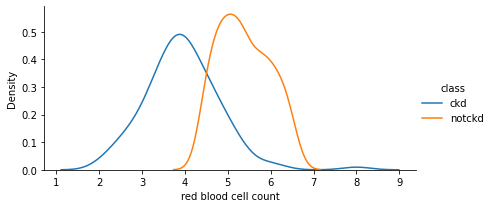

In [97]:
grid=sns.FacetGrid(data, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

### Defining violin and scatter plot & kde_plot functions

In [98]:
def violin(col):
    fig=px.violin(data,y=col,x="class",color="class",box=True)
    return fig.show()

In [99]:
def scatter(col1,col2):
    fig=px.scatter(data,x=col1,y=col2,color="class")
    return fig.show()

In [100]:
def kde_plot(feature):
    #Analysing distribution of red blood cell count, chronic and non-chronic
    grid=sns.FacetGrid(data, hue="class",aspect=2)
    grid.map(sns.kdeplot, 'red blood cell count')
    grid.add_legend()

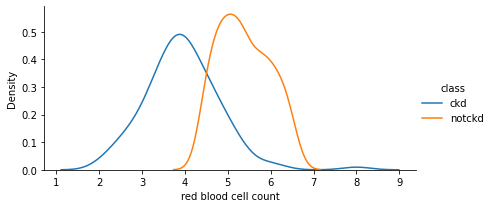

In [101]:
kde_plot('red blood cell count')

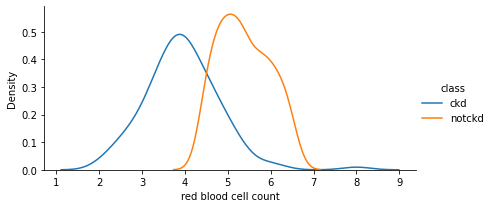

In [102]:
kde_plot('haemoglobin')

### Perform EDA (Exploratory data Analyses) on data

In [103]:
scatter('red blood cell count','packed cell volume')

In [104]:
scatter('red blood cell count', 'haemoglobin')

1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
disease(i.e ckd).
2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
disease(i.e nockd).

In [105]:
scatter('packed cell volume','haemoglobin')

### Analysing Distribution of particular feature

In [106]:
violin("red blood cell count")

In [107]:
violin('packed cell volume')

### check for negative correlation and its impact on classes

In [108]:
scatter('red blood cell count','albumin')
#Clearly, albumin levels of above 0 affect ckd largely

In [110]:
scatter('packed cell volume','blood urea')
#Packed cell volume >= 40 largely affects to be notckd

### Check missing values in Numerical and categorical feature and fix it

In [42]:
data.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

#### Imputing Random values to the blank space

#### Example1: Fill Random Values into "pus cell" without affecting the distribution which has large number of missing values

#Number of missing values before random value insertion
data[' pus cell'].isnull().sum()

#Imputing Random values
data[' pus cell'].dropna().sample()

#Missing value indexes
data[data[' pus cell'].isnull()].index

#But here we ll get different index
#It is important that index has to be equal
random_sample.index

Now we have got same indexes and now we can add this into pus cell col
random_sample.index=data[data[' pus cell'].isnull()].index
random_sample.index

Location of data
data.loc[data[' pus cell'].isnull(),' pus cell']=random_sample

#### Example2 : Fill Random Values into "pus_cell_clumps"  using Mode concept which has less number of missing values

For particular value
mode=data['pus cell clumps'].mode()[0]
mode

In general
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

for col in cat_col:
    impute_mode(col)
    
data[cat_col].isnull().sum()

In [125]:
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [130]:
for col in num_col:
    Random_value_imputation(col)

In [131]:
data.isna().sum().sort_values(ascending=False)

age                        0
potassium                  0
anemia                     0
pedal edema                0
appetite                   0
coronary artery disease    0
diabetes mellitus          0
ypertension                0
red blood cell count       0
white blood cell count     0
packed cell volume         0
haemoglobin                0
sodium                     0
blood pressure             0
serum creatinine           0
blood urea                 0
blood glucose random       0
bacteria                   0
pus cell clumps            0
 pus cell                  0
red blood cells            0
sugar                      0
albumin                    0
specific gravity           0
class                      0
dtype: int64

In [134]:
data.head()
#Now all the blank spaces are filled with random values

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,153.0,...,38.0,6000.0,4.7,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### Applying feature Encoding Technique on data

Why Encoding Technique? 
ML is not able to understand categorical data value that means we have to convert all the categorical features into some numercial format so that it will be compatable with my machine learning.

In [135]:
#How many unique category, how many unique labels in each and every categorical features
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))

red blood cells has 2 categories
 pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


In [136]:
#as we have just 2-3 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality
from sklearn.preprocessing import LabelEncoder

In [137]:
le = LabelEncoder()

In [138]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [139]:
data.head()
#Now cat data is converted to num data

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,153.0,...,38.0,6000.0,4.7,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.2,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


### Selecting best features for our model using suitable feature importance techniques

In [140]:
#SelectKBest Also known as Information Gain, to select k best features

#chi2-Internally this class is going to check that whether probability-value is less than 0.05 or not
#based on that,it will actually order all the features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [141]:
ind_col=[col for col in data.columns if col!='class']
dep_col='class'

In [142]:
X=data[ind_col]
Y=data[dep_col]

In [143]:
X
#All my independent values

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,153.0,...,11.3,38.0,6000.0,4.7,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.2,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,1,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,1,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,1,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,1,0,0,0,0


In [145]:
Y
#All my dependent values

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int32

In [146]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,Y)

In [147]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x0000011581A19D30>)

In [149]:
#To get scores(rank) of feature,what we can do we can use scores function
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,110.481119
1,76.071219
2,0.005511
3,225.307443
4,111.600000
5,9.839337
6,15.151025
7,25.200000
8,10.785507
9,2582.293671


In [151]:
datacolumns=pd.DataFrame(X.columns)
datacolumns

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [154]:
features_rank=pd.concat([datacolumns,datascores],axis=1)
features_rank.columns=['Features','Score']

In [155]:
features_rank
#Higher the score is,more important feature is 

,Features,Score
0,age,110.481119
1,blood pressure,76.071219
2,specific gravity,0.005511
3,albumin,225.307443
4,sugar,111.600000
5,red blood cells,9.839337
6,pus cell,15.151025
7,pus cell clumps,25.200000
8,bacteria,10.785507
9,blood glucose random,2582.293671


#### fetching largest 10 values of Score column

In [156]:
features_rank.nlargest(10,'Score')

,Features,Score
16,white blood cell count,13657.239035
9,blood glucose random,2582.293671
10,blood urea,2263.733010
11,serum creatinine,359.781097
15,packed cell volume,345.790449
3,albumin,225.307443
14,haemoglobin,125.346495
4,sugar,111.600000
0,age,110.481119
18,ypertension,85.628829


In [159]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [163]:
X_new=data[selected_columns]

#### These are the independent data that we exactly need to predict whether a person is going to have Chronic KidneyDisease or not

In [164]:
X_new.head()

,white blood cell count,blood glucose random,blood urea,serum creatinine,packed cell volume,albumin,haemoglobin,sugar,age,ypertension
0,7800.0,121.0,36.0,1.2,44.0,1.0,15.4,0.0,48.0,1
1,6000.0,153.0,18.0,0.8,38.0,4.0,11.3,0.0,7.0,0
2,7500.0,423.0,53.0,1.8,31.0,2.0,9.6,3.0,62.0,0
3,6700.0,117.0,56.0,3.8,32.0,4.0,11.2,0.0,48.0,1
4,7300.0,106.0,26.0,1.4,35.0,2.0,11.6,0.0,51.0,0


In [166]:
X_new.shape
#14 features get eliminated once we use our best feature selection algorithm.

(400, 10)



### Building a Cross-Validation Model and Predict and Check accuracy of our Model



In [169]:
#We need some training and testing data's so that we can train our model so that i can do prediction
#For this I have to split my data's 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y,random_state=0,test_size=0.25)

In [170]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


#### check whether dataset is imbalance or not

In [171]:
Y_train.value_counts()
#It seems it doesn't have that much imbalance condition, we can pass this data to ML model

0    188
1    112
Name: class, dtype: int64

#### Lets find best model using Hyperparameter optimization

In [178]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [179]:
from xgboost import XGBClassifier
XGBClassifier()
#Based on these parameter values, we have to find what exactly is my best model depending upon here

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [180]:
## Hyper Parameter Optimization with respect to XGBoost
#I have to pass it to my randomized search theory, cross validation algorithm

params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [181]:
from sklearn.model_selection import RandomizedSearchCV

In [182]:
classifier=XGBClassifier()

In [184]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [186]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[14:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [187]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [188]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [189]:
#we have got this model on the basis of cross valudation & hyper-parameter optimization
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [192]:
classifier.fit(X_train,Y_train)

[14:50:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [194]:
Y_pred=classifier.predict(X_test)

In [199]:
Y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [200]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [201]:
confusion = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[59  3]
 [ 0 38]]


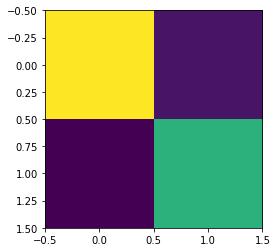

In [203]:
### to make confusion matrix user-friendly
plt.imshow(confusion)

59 and 36 are our right predictions. Huge number of predictions that are going to be correct

In [202]:
accuracy_score(Y_test, Y_pred)
#we have got a good accuracy over here almost 97%
#Our model is performing damn good over in this use case

0.97